In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

Using TensorFlow backend.


In [41]:
dataset = pd.read_csv("C:\\Users\\keerthana\\Desktop\\project2\\Finite_element_dataset.csv").drop_duplicates(subset = 
('Velocity','Projectile','Angle','Laminate'), keep = 'last')
X = dataset.loc[:, :].values
X.shape

(139, 5)

In [3]:
dataset2 = pd.read_csv("C:\\Users\\keerthana\\Desktop\\project2\\Finite_element_target.csv")
Y = dataset2.loc[dataset.index.intersection(dataset2.index)].values
Y.shape

(138, 1)

In [4]:
ct=ColumnTransformer(transformers=[("oh",OneHotEncoder(),[2,3,4])],remainder="passthrough")
X= ct.fit_transform(X)
X.shape

(139, 12)

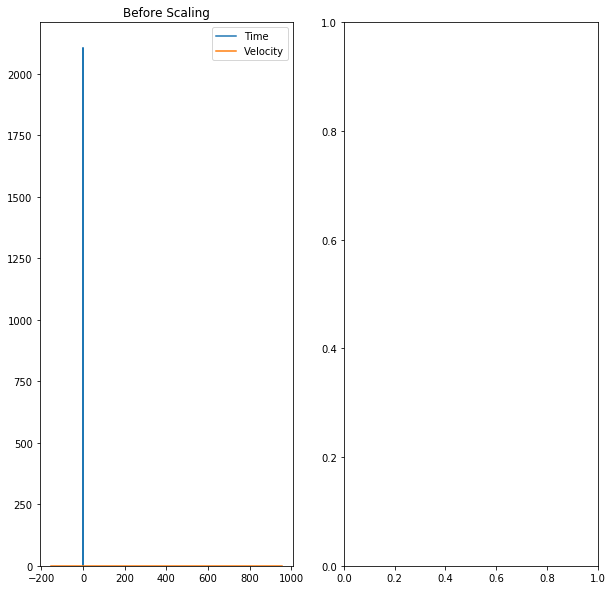

In [5]:
fig, (ob1,ob2)= plt.subplots(ncols=2 , figsize= (10,10))
ob1.set_title('Before Scaling')
sns.kdeplot(dataset['Time'],ax=ob1)
sns.kdeplot(dataset['Velocity'],ax=ob1)

In [6]:
sc = preprocessing.MinMaxScaler(feature_range=(0,1))
X[:,[10,11]] = sc.fit_transform((X[:, [10,11]]))
Z= pd.DataFrame(X)

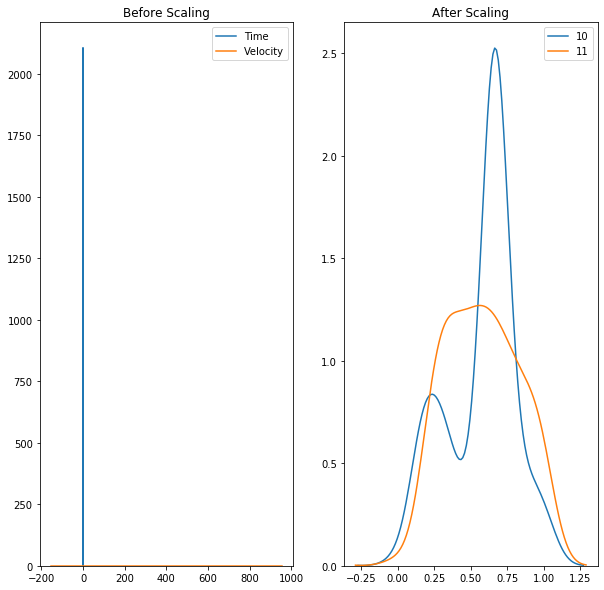

In [7]:
scaled = Z.iloc[:,:]
ob2.set_title('After Scaling')
sns.kdeplot(scaled[10],ax=ob2)
sns.kdeplot(scaled[11],ax=ob2)
ob2.figure

In [8]:
Train= Z.iloc[0:138]
Input= Z.iloc[138::]
train_x, test_x, train_y, test_y = train_test_split(Train, Y, test_size=0.20, random_state=415)
validation_x, testing_x, validation_y, testing_y = train_test_split(test_x,test_y,test_size=0.50, random_state=415)

In [9]:
def neural_network(n):
    model = Sequential()
    model.add(Dense(12, activation='relu', input_shape=(12,)))
    model.add(Dense(n, activation='relu'))
    model.add(Dense(n, activation='relu'))
    model.add(Dense(n, activation='relu'))
    model.add(Dense(1,))
    model.compile( loss='mse', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
    history = model.fit(train_x,train_y,validation_data=(validation_x,validation_y),callbacks=[monitor],verbose=2,epochs=1000)
    history_dict=history.history
    loss_values= history_dict['loss']
    val_loss_values=history_dict['val_loss']
    return model, loss_values, val_loss_values
                                                        
def average(Error):
    return sum(abs(Error))/len(Error)
def average(Error_testing):
    return sum(abs(Error_testing))/len(Error_testing)
def error_calc(actual,predicted):
    error = ((actual - predicted)/actual)
    return error

In [47]:
model, loss_values, val_loss_values = neural_network(10)
y_train_pred =model.predict(train_x)
y_validation_pred= model.predict(validation_x)
final_result= model.predict(testing_x)
Unseen_result = model.predict(Input)
Error_train = error_calc(train_y,y_train_pred)
Error_validate = error_calc(validation_y,y_validation_pred)
Relative_Error= average(Error_validate)
Error_testing= error_calc(testing_y,final_result)
Testing_Relative_Error= average(Error_testing)

Train on 110 samples, validate on 14 samples
Epoch 1/1000
 - 0s - loss: 80943.8963 - val_loss: 143251.8438
Epoch 2/1000
 - 0s - loss: 80929.8661 - val_loss: 143230.6406
Epoch 3/1000
 - 0s - loss: 80915.5342 - val_loss: 143209.5938
Epoch 4/1000
 - 0s - loss: 80900.6987 - val_loss: 143189.1094
Epoch 5/1000
 - 0s - loss: 80885.0058 - val_loss: 143167.4688
Epoch 6/1000
 - 0s - loss: 80868.3484 - val_loss: 143143.0312
Epoch 7/1000
 - 0s - loss: 80849.7618 - val_loss: 143115.7344
Epoch 8/1000
 - 0s - loss: 80829.1058 - val_loss: 143085.3438
Epoch 9/1000
 - 0s - loss: 80804.7670 - val_loss: 143052.1250
Epoch 10/1000
 - 0s - loss: 80779.9452 - val_loss: 143014.1562
Epoch 11/1000
 - 0s - loss: 80747.5291 - val_loss: 142971.5156
Epoch 12/1000
 - 0s - loss: 80715.6686 - val_loss: 142919.1562
Epoch 13/1000
 - 0s - loss: 80673.6435 - val_loss: 142857.2188
Epoch 14/1000
 - 0s - loss: 80628.4726 - val_loss: 142786.0625
Epoch 15/1000
 - 0s - loss: 80575.3012 - val_loss: 142703.5938
Epoch 16/1000
 - 0s

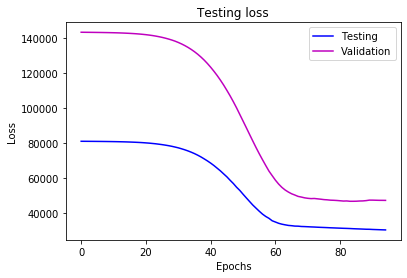

In [48]:
epochs = range(0,95)
plt.plot(epochs, loss_values, 'b', label='Testing')
plt.plot(epochs, val_loss_values, 'm', label='Validation')
plt.title('Testing loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
print('Each layer-10 neurons: ',Testing_Relative_Error)

Each layer-10 neurons:  [0.74210041]


In [50]:
model, loss_values, val_loss_values = neural_network(20)
y_train_pred =model.predict(train_x)
y_validation_pred= model.predict(validation_x)
final_result= model.predict(testing_x)
Unseen_result = model.predict(Input)
Error_train = error_calc(train_y,y_train_pred)
Error_validate = error_calc(validation_y,y_validation_pred)
Relative_Error= average(Error_validate)
Error_testing= error_calc(testing_y,final_result)
Testing_Relative_Error= average(Error_testing)

Train on 110 samples, validate on 14 samples
Epoch 1/1000
 - 0s - loss: 80925.3202 - val_loss: 143219.3281
Epoch 2/1000
 - 0s - loss: 80900.8172 - val_loss: 143191.2500
Epoch 3/1000
 - 0s - loss: 80876.2747 - val_loss: 143160.8438
Epoch 4/1000
 - 0s - loss: 80852.2686 - val_loss: 143127.0156
Epoch 5/1000
 - 0s - loss: 80823.9462 - val_loss: 143089.2344
Epoch 6/1000
 - 0s - loss: 80793.2239 - val_loss: 143045.1094
Epoch 7/1000
 - 0s - loss: 80756.0318 - val_loss: 142993.4062
Epoch 8/1000
 - 0s - loss: 80716.3487 - val_loss: 142931.2031
Epoch 9/1000
 - 0s - loss: 80663.7306 - val_loss: 142856.7656
Epoch 10/1000
 - 0s - loss: 80599.7004 - val_loss: 142765.0469
Epoch 11/1000
 - 0s - loss: 80523.1693 - val_loss: 142652.1562
Epoch 12/1000
 - 0s - loss: 80432.1188 - val_loss: 142515.1719
Epoch 13/1000
 - 0s - loss: 80315.1912 - val_loss: 142351.7188
Epoch 14/1000
 - 0s - loss: 80183.9862 - val_loss: 142143.1406
Epoch 15/1000
 - 0s - loss: 80014.0378 - val_loss: 141881.4531
Epoch 16/1000
 - 0s

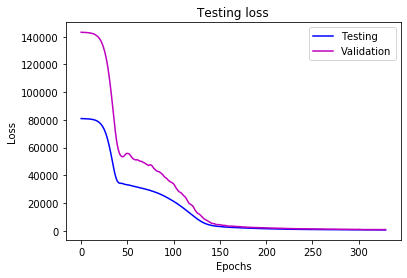

In [51]:
epochs = range(0,330)
plt.plot(epochs, loss_values, 'b', label='Testing')
plt.plot(epochs, val_loss_values, 'm', label='Validation')
plt.title('Testing loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [52]:
print('Each layer-20 neurons: ',Testing_Relative_Error)

Each layer-20 neurons:  [0.11900052]


In [53]:
model, loss_values, val_loss_values = neural_network(30)
y_train_pred =model.predict(train_x)
y_validation_pred= model.predict(validation_x)
final_result= model.predict(testing_x)
Unseen_result = model.predict(Input)
Error_train = error_calc(train_y,y_train_pred)
Error_validate = error_calc(validation_y,y_validation_pred)
Relative_Error= average(Error_validate)
Error_testing= error_calc(testing_y,final_result)
Testing_Relative_Error= average(Error_testing)

Train on 110 samples, validate on 14 samples
Epoch 1/1000
 - 0s - loss: 81085.6760 - val_loss: 143398.5938
Epoch 2/1000
 - 0s - loss: 81030.8295 - val_loss: 143332.5781
Epoch 3/1000
 - 0s - loss: 80985.3396 - val_loss: 143282.5000
Epoch 4/1000
 - 0s - loss: 80952.3917 - val_loss: 143243.2188
Epoch 5/1000
 - 0s - loss: 80925.6139 - val_loss: 143208.8906
Epoch 6/1000
 - 0s - loss: 80901.6484 - val_loss: 143173.5781
Epoch 7/1000
 - 0s - loss: 80875.3662 - val_loss: 143133.3906
Epoch 8/1000
 - 0s - loss: 80846.4043 - val_loss: 143083.9688
Epoch 9/1000
 - 0s - loss: 80810.1318 - val_loss: 143024.0781
Epoch 10/1000
 - 0s - loss: 80763.3773 - val_loss: 142951.4531
Epoch 11/1000
 - 0s - loss: 80708.0776 - val_loss: 142860.0000
Epoch 12/1000
 - 0s - loss: 80635.9158 - val_loss: 142744.7031
Epoch 13/1000
 - 0s - loss: 80545.6470 - val_loss: 142597.9375
Epoch 14/1000
 - 0s - loss: 80429.6703 - val_loss: 142411.1250
Epoch 15/1000
 - 0s - loss: 80285.9775 - val_loss: 142168.9688
Epoch 16/1000
 - 0s

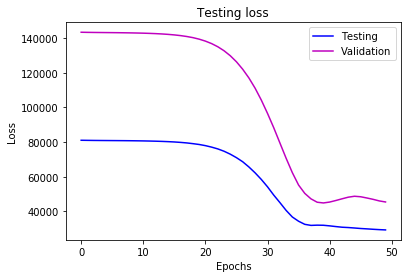

In [54]:
epochs = range(0,50)
plt.plot(epochs, loss_values, 'b', label='Testing')
plt.plot(epochs, val_loss_values, 'm', label='Validation')
plt.title('Testing loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
print('Each layer-30 neurons: ',Testing_Relative_Error)

Each layer-30 neurons:  [0.75802773]


In [56]:
model, loss_values, val_loss_values = neural_network(40)
y_train_pred =model.predict(train_x)
y_validation_pred= model.predict(validation_x)
final_result= model.predict(testing_x)
Unseen_result = model.predict(Input)
Error_train = error_calc(train_y,y_train_pred)
Error_validate = error_calc(validation_y,y_validation_pred)
Relative_Error= average(Error_validate)
Error_testing= error_calc(testing_y,final_result)
Testing_Relative_Error= average(Error_testing)

Train on 110 samples, validate on 14 samples
Epoch 1/1000
 - 0s - loss: 81020.5021 - val_loss: 143322.6094
Epoch 2/1000
 - 0s - loss: 80962.4442 - val_loss: 143244.1719
Epoch 3/1000
 - 0s - loss: 80912.6511 - val_loss: 143169.1562
Epoch 4/1000
 - 0s - loss: 80862.3700 - val_loss: 143088.5938
Epoch 5/1000
 - 0s - loss: 80800.9786 - val_loss: 142993.8906
Epoch 6/1000
 - 0s - loss: 80730.1224 - val_loss: 142873.5781
Epoch 7/1000
 - 0s - loss: 80644.5541 - val_loss: 142717.0312
Epoch 8/1000
 - 0s - loss: 80526.7435 - val_loss: 142515.7344
Epoch 9/1000
 - 0s - loss: 80372.2923 - val_loss: 142251.3281
Epoch 10/1000
 - 0s - loss: 80172.6776 - val_loss: 141904.0938
Epoch 11/1000
 - 0s - loss: 79943.8400 - val_loss: 141442.0312
Epoch 12/1000
 - 0s - loss: 79611.7935 - val_loss: 140849.0469
Epoch 13/1000
 - 0s - loss: 79211.4853 - val_loss: 140071.2344
Epoch 14/1000
 - 0s - loss: 78680.4777 - val_loss: 139058.8281
Epoch 15/1000
 - 0s - loss: 78000.5818 - val_loss: 137743.7031
Epoch 16/1000
 - 0s

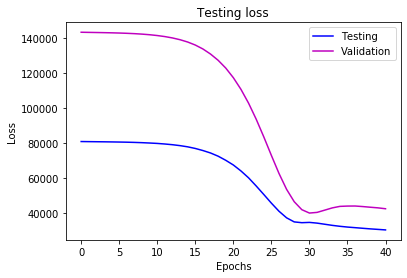

In [57]:
epochs = range(0,41)
plt.plot(epochs, loss_values, 'b', label='Testing')
plt.plot(epochs, val_loss_values, 'm', label='Validation')
plt.title('Testing loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [58]:

print('Each layer-40 neurons: ',Testing_Relative_Error)

Each layer-40 neurons:  [0.69934604]


In [61]:

model, loss_values, val_loss_values = neural_network(50)
y_train_pred =model.predict(train_x)
y_validation_pred= model.predict(validation_x)
final_result= model.predict(testing_x)
Unseen_result = model.predict(Input)
Error_train = error_calc(train_y,y_train_pred)
Error_validate = error_calc(validation_y,y_validation_pred)
Relative_Error= average(Error_validate)
Error_testing= error_calc(testing_y,final_result)
Testing_Relative_Error= average(Error_testing)

Train on 110 samples, validate on 14 samples
Epoch 1/1000
 - 0s - loss: 80829.7831 - val_loss: 142988.4688
Epoch 2/1000
 - 0s - loss: 80744.6376 - val_loss: 142844.1875
Epoch 3/1000
 - 0s - loss: 80643.9967 - val_loss: 142662.0469
Epoch 4/1000
 - 0s - loss: 80511.6109 - val_loss: 142428.6094
Epoch 5/1000
 - 0s - loss: 80351.0229 - val_loss: 142126.1250
Epoch 6/1000
 - 0s - loss: 80139.6959 - val_loss: 141730.4688
Epoch 7/1000
 - 0s - loss: 79862.3771 - val_loss: 141209.6562
Epoch 8/1000
 - 0s - loss: 79481.1101 - val_loss: 140523.8594
Epoch 9/1000
 - 0s - loss: 79004.1655 - val_loss: 139612.4062
Epoch 10/1000
 - 0s - loss: 78376.4807 - val_loss: 138406.0781
Epoch 11/1000
 - 0s - loss: 77536.3820 - val_loss: 136814.7656
Epoch 12/1000
 - 0s - loss: 76460.7342 - val_loss: 134733.2656
Epoch 13/1000
 - 0s - loss: 75001.8396 - val_loss: 132053.2031
Epoch 14/1000
 - 0s - loss: 73180.6023 - val_loss: 128587.0703
Epoch 15/1000
 - 0s - loss: 70876.4405 - val_loss: 124172.0703
Epoch 16/1000
 - 0s

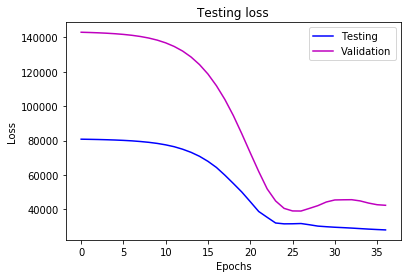

In [62]:
epochs = range(0,37)
plt.plot(epochs, loss_values, 'b', label='Testing')
plt.plot(epochs, val_loss_values, 'm', label='Validation')
plt.title('Testing loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
print('Each layer-50 neurons: ',Testing_Relative_Error)

Each layer-50 neurons:  [0.6674688]


In [64]:
model, loss_values, val_loss_values = neural_network(60)
y_train_pred =model.predict(train_x)
y_validation_pred= model.predict(validation_x)
final_result= model.predict(testing_x)
Unseen_result = model.predict(Input)
Error_train = error_calc(train_y,y_train_pred)
Error_validate = error_calc(validation_y,y_validation_pred)
Relative_Error= average(Error_validate)
Error_testing= error_calc(testing_y,final_result)
Testing_Relative_Error= average(Error_testing)

Train on 110 samples, validate on 14 samples
Epoch 1/1000
 - 0s - loss: 80914.1693 - val_loss: 143131.8438
Epoch 2/1000
 - 0s - loss: 80835.4402 - val_loss: 142998.9844
Epoch 3/1000
 - 0s - loss: 80738.9402 - val_loss: 142840.3281
Epoch 4/1000
 - 0s - loss: 80635.5527 - val_loss: 142644.1719
Epoch 5/1000
 - 0s - loss: 80489.1408 - val_loss: 142393.1250
Epoch 6/1000
 - 0s - loss: 80304.6014 - val_loss: 142057.2344
Epoch 7/1000
 - 0s - loss: 80060.9270 - val_loss: 141598.0469
Epoch 8/1000
 - 0s - loss: 79718.9575 - val_loss: 140970.2031
Epoch 9/1000
 - 0s - loss: 79257.4338 - val_loss: 140106.4688
Epoch 10/1000
 - 0s - loss: 78612.9574 - val_loss: 138920.1562
Epoch 11/1000
 - 0s - loss: 77764.0687 - val_loss: 137306.1719
Epoch 12/1000
 - 0s - loss: 76579.0547 - val_loss: 135125.1562
Epoch 13/1000
 - 0s - loss: 75001.6509 - val_loss: 132190.9688
Epoch 14/1000
 - 0s - loss: 72905.4882 - val_loss: 128246.5547
Epoch 15/1000
 - 0s - loss: 70183.1469 - val_loss: 123051.1250
Epoch 16/1000
 - 0s

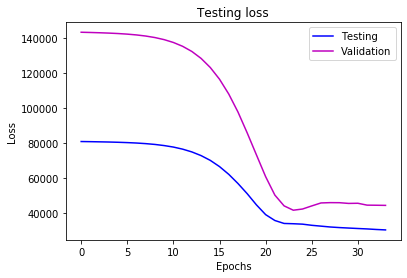

In [65]:
epochs = range(0,34)
plt.plot(epochs, loss_values, 'b', label='Testing')
plt.plot(epochs, val_loss_values, 'm', label='Validation')
plt.title('Testing loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
print('Each layer-60 neurons: ',Testing_Relative_Error)

Each layer-60 neurons:  [0.73602454]


In [67]:
model, loss_values, val_loss_values = neural_network(70)
y_train_pred =model.predict(train_x)
y_validation_pred= model.predict(validation_x)
final_result= model.predict(testing_x)
Unseen_result = model.predict(Input)
Error_train = error_calc(train_y,y_train_pred)
Error_validate = error_calc(validation_y,y_validation_pred)
Relative_Error= average(Error_validate)
Error_testing= error_calc(testing_y,final_result)
Testing_Relative_Error= average(Error_testing)

Train on 110 samples, validate on 14 samples
Epoch 1/1000
 - 0s - loss: 80977.8915 - val_loss: 143211.5469
Epoch 2/1000
 - 0s - loss: 80890.7089 - val_loss: 143078.7344
Epoch 3/1000
 - 0s - loss: 80808.7743 - val_loss: 142921.0312
Epoch 4/1000
 - 0s - loss: 80698.8118 - val_loss: 142714.1094
Epoch 5/1000
 - 0s - loss: 80555.0760 - val_loss: 142420.2188
Epoch 6/1000
 - 0s - loss: 80348.3151 - val_loss: 141987.6562
Epoch 7/1000
 - 0s - loss: 80020.2993 - val_loss: 141360.5156
Epoch 8/1000
 - 0s - loss: 79594.8230 - val_loss: 140449.8281
Epoch 9/1000
 - 0s - loss: 78937.9970 - val_loss: 139148.2656
Epoch 10/1000
 - 0s - loss: 78004.1974 - val_loss: 137309.8281
Epoch 11/1000
 - 0s - loss: 76716.7518 - val_loss: 134706.8281
Epoch 12/1000
 - 0s - loss: 74900.1486 - val_loss: 131127.7344
Epoch 13/1000
 - 0s - loss: 72413.1072 - val_loss: 126278.7891
Epoch 14/1000
 - 0s - loss: 69245.1002 - val_loss: 119804.7656
Epoch 15/1000
 - 0s - loss: 64748.0389 - val_loss: 111435.5859
Epoch 16/1000
 - 0s

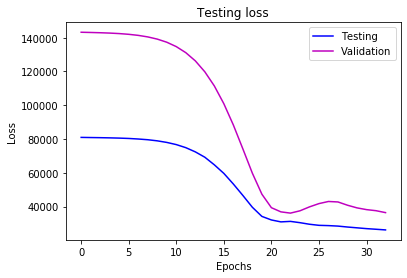

In [68]:
epochs = range(0,33)
plt.plot(epochs, loss_values, 'b', label='Testing')
plt.plot(epochs, val_loss_values, 'm', label='Validation')
plt.title('Testing loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
print('Each layer-70 neurons: ',Testing_Relative_Error)

Each layer-70 neurons:  [0.70542795]


In [70]:
model, loss_values, val_loss_values = neural_network(80)
y_train_pred =model.predict(train_x)
y_validation_pred= model.predict(validation_x)
final_result= model.predict(testing_x)
Unseen_result = model.predict(Input)
Error_train = error_calc(train_y,y_train_pred)
Error_validate = error_calc(validation_y,y_validation_pred)
Relative_Error= average(Error_validate)
Error_testing= error_calc(testing_y,final_result)
Testing_Relative_Error= average(Error_testing)

Train on 110 samples, validate on 14 samples
Epoch 1/1000
 - 0s - loss: 80937.3959 - val_loss: 143145.2500
Epoch 2/1000
 - 0s - loss: 80840.7717 - val_loss: 142963.7969
Epoch 3/1000
 - 0s - loss: 80704.7776 - val_loss: 142727.7969
Epoch 4/1000
 - 0s - loss: 80549.2980 - val_loss: 142402.4844
Epoch 5/1000
 - 0s - loss: 80304.7452 - val_loss: 141941.7500
Epoch 6/1000
 - 0s - loss: 79985.5122 - val_loss: 141271.8906
Epoch 7/1000
 - 0s - loss: 79510.1310 - val_loss: 140289.8281
Epoch 8/1000
 - 0s - loss: 78792.2254 - val_loss: 138852.2812
Epoch 9/1000
 - 0s - loss: 77824.6515 - val_loss: 136777.5312
Epoch 10/1000
 - 0s - loss: 76351.7399 - val_loss: 133843.8438
Epoch 11/1000
 - 0s - loss: 74272.5439 - val_loss: 129721.5547
Epoch 12/1000
 - 0s - loss: 71561.9357 - val_loss: 124059.2734
Epoch 13/1000
 - 0s - loss: 67720.8706 - val_loss: 116525.5000
Epoch 14/1000
 - 0s - loss: 63077.0840 - val_loss: 106682.8750
Epoch 15/1000
 - 0s - loss: 56668.9124 - val_loss: 94772.6797
Epoch 16/1000
 - 0s 

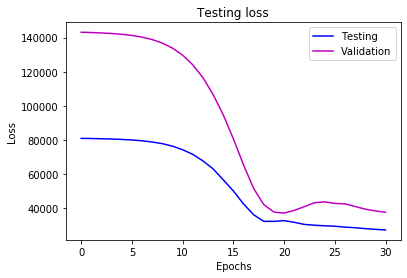

In [71]:
epochs = range(0,31)
plt.plot(epochs, loss_values, 'b', label='Testing')
plt.plot(epochs, val_loss_values, 'm', label='Validation')
plt.title('Testing loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
print('Each layer-80 neurons: ',Testing_Relative_Error)

Each layer-80 neurons:  [0.71561338]


In [73]:
model, loss_values, val_loss_values = neural_network(90)
y_train_pred =model.predict(train_x)
y_validation_pred= model.predict(validation_x)
final_result= model.predict(testing_x)
Unseen_result = model.predict(Input)
Error_train = error_calc(train_y,y_train_pred)
Error_validate = error_calc(validation_y,y_validation_pred)
Relative_Error= average(Error_validate)
Error_testing= error_calc(testing_y,final_result)
Testing_Relative_Error= average(Error_testing)

Train on 110 samples, validate on 14 samples
Epoch 1/1000
 - 0s - loss: 80940.8091 - val_loss: 143127.4688
Epoch 2/1000
 - 0s - loss: 80814.1135 - val_loss: 142953.3281
Epoch 3/1000
 - 0s - loss: 80665.7842 - val_loss: 142721.7656
Epoch 4/1000
 - 0s - loss: 80476.3166 - val_loss: 142386.8750
Epoch 5/1000
 - 0s - loss: 80183.7453 - val_loss: 141914.8594
Epoch 6/1000
 - 0s - loss: 79795.1189 - val_loss: 141237.9844
Epoch 7/1000
 - 0s - loss: 79237.4080 - val_loss: 140242.5156
Epoch 8/1000
 - 0s - loss: 78437.9170 - val_loss: 138787.3281
Epoch 9/1000
 - 0s - loss: 77226.7786 - val_loss: 136674.3438
Epoch 10/1000
 - 0s - loss: 75633.4315 - val_loss: 133706.5469
Epoch 11/1000
 - 0s - loss: 73195.6131 - val_loss: 129659.3906
Epoch 12/1000
 - 0s - loss: 70101.6239 - val_loss: 124130.3047
Epoch 13/1000
 - 0s - loss: 65817.0446 - val_loss: 116910.2891
Epoch 14/1000
 - 0s - loss: 60829.1148 - val_loss: 107451.0859
Epoch 15/1000
 - 0s - loss: 54454.1239 - val_loss: 96103.0859
Epoch 16/1000
 - 0s 

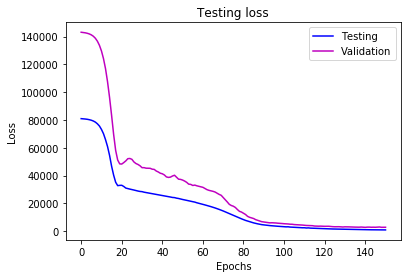

In [74]:
epochs = range(0,151)
plt.plot(epochs, loss_values, 'b', label='Testing')
plt.plot(epochs, val_loss_values, 'm', label='Validation')
plt.title('Testing loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
print('Each layer-90 neurons: ',Testing_Relative_Error)

Each layer-90 neurons:  [0.23356313]
